### Requirement

In [1]:
# understand the current purchasing trends and behaviours. 
# The client is particularly interested in customer segments and their chip purchasing behaviour

In [2]:
#Variables in Transaction Dataset:
#1. DATE: date of the transaction
#2. STORE_NBR: store id
#3. LYLTY_CARD_NBR: customer loyalty card number
#4. TXN_ID: transaction number
#5. PROD_NBR: product number/ID
#6. PROD_NAME: product name
#7. PROD_QTY: product quantity
#8. TOT_SALES: total sales

#Variables in Transaction Dataset:
#1. LYLTY_CARD_NBR: customer loyalty card number
#2. LIFESTAGE: customer segmentation by age
#3. PREMIUM_CUSTOMER: type of membership

ERROR! Session/line number was not unique in database. History logging moved to new session 54


### Import libraries and dataset

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime

In [4]:
transaction = pd.read_csv(r'C:\Users\Dell\Desktop\Forage\Quantium\QVI_transaction_data.csv')
purchase = pd.read_csv(r'C:\Users\Dell\Desktop\Forage\Quantium\QVI_purchase_behaviour.csv')

In [5]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### EDA

#### Cleaning

In [6]:
transaction.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [7]:
transaction['DATE'] = pd.to_datetime(transaction['DATE'], unit='D', origin='1899-12-30')

# Convert the datetime column to the desired format
transaction['DATE'] = transaction['DATE'].dt.strftime('%d/%m/%Y')
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


In [8]:
transaction['DATE'] = pd.to_datetime(transaction['DATE'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_17440\3462090401.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  transaction['DATE'] = pd.to_datetime(transaction['DATE'])


In [9]:
transaction['PROD_NAME'].head(20)

# select chip product
chips = transaction[transaction['PROD_NAME'].str.contains('chips',case=False)]

chip = transaction[transaction['PROD_NAME'].str.contains('chip',case=False)]


In [10]:
# Count chip product
chip_count = chip['PROD_NAME'].str.contains('chip',case=False).sum()
chips_count = chip['PROD_NAME'].str.contains('chips',case=False).sum()

print(chip_count) #74570
print(chips_count) #49770

74570
49770


In [11]:
# chip dateset contain chips dataset already -> use "chip" dataset
chip_product = chip.reset_index(drop=True)
chip_product.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
2,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
3,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
4,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9


In [12]:
# check outlier

outlier = chip_product.sort_values(by='PROD_QTY', ascending=False)
outlier


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
19694,2018-08-18,55,55144,49328,44,Thins Chips Light& Tangy 175g,5,16.5
38143,2019-05-15,49,49361,46001,42,Doritos Corn Chip Mexican Jalapeno 150g,5,19.5
22988,2019-05-17,217,217183,217138,44,Thins Chips Light& Tangy 175g,5,16.5
9214,2019-05-18,196,196102,196049,1,Smiths Crinkle Cut Chips Barbecue 170g,5,14.5
38130,2018-08-18,19,19188,16426,93,Doritos Corn Chip Southern Chicken 150g,5,19.5
...,...,...,...,...,...,...,...,...
28161,2019-05-15,232,232076,235632,28,Thins Potato Chips Hot & Spicy 175g,1,3.3
28162,2018-08-15,237,237269,241332,75,Cobs Popd Sea Salt Chips 110g,1,3.8
28163,2019-05-14,238,238084,242217,40,Thins Chips Seasonedchicken 175g,1,3.3
68240,2018-11-05,46,46458,42306,78,Thins Chips Salt & Vinegar 175g,1,3.3


In [13]:
chip_product['PACKAGE'] = chip_product['PROD_NAME'].str.extract(r'(\d+)')
chip_product['PACKAGE'] = chip_product['PACKAGE'].astype('category')
chip_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74570 entries, 0 to 74569
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            74570 non-null  datetime64[ns]
 1   STORE_NBR       74570 non-null  int64         
 2   LYLTY_CARD_NBR  74570 non-null  int64         
 3   TXN_ID          74570 non-null  int64         
 4   PROD_NBR        74570 non-null  int64         
 5   PROD_NAME       74570 non-null  object        
 6   PROD_QTY        74570 non-null  int64         
 7   TOT_SALES       74570 non-null  float64       
 8   PACKAGE         74570 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 4.6+ MB


In [14]:
chip_product['PRICE'] = chip_product['TOT_SALES']/chip_product['PROD_QTY']
chip_product

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKAGE,PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,3.00
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,1.45
2,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,3.00
3,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,5.70
4,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150,3.90
...,...,...,...,...,...,...,...,...,...,...
74565,2018-11-04,271,271193,269365,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110,3.80
74566,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110,3.80
74567,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110,3.80
74568,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,175,3.30


In [15]:
merge_dataset = pd.merge(chip_product, purchase, on='LYLTY_CARD_NBR')
merge_dataset

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKAGE,PRICE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,3.00,YOUNG SINGLES/COUPLES,Premium
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,1.45,MIDAGE SINGLES/COUPLES,Budget
2,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,3.00,MIDAGE SINGLES/COUPLES,Budget
3,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,5.70,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150,3.90,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
74565,2018-11-04,271,271193,269365,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110,3.80,YOUNG SINGLES/COUPLES,Premium
74566,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110,3.80,YOUNG SINGLES/COUPLES,Premium
74567,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110,3.80,YOUNG SINGLES/COUPLES,Premium
74568,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,175,3.30,YOUNG SINGLES/COUPLES,Premium


In [16]:
merge_dataset['LIFESTAGE'] = merge_dataset['LIFESTAGE'].str.capitalize()

In [17]:
merge_dataset['BRAND'] = merge_dataset['PROD_NAME'].str.split().str[0]

a = merge_dataset['BRAND'].unique()

merge_dataset['BRAND'] = merge_dataset['BRAND'].str.replace('WW', 'Woolworths')

#### EDA

In [18]:
merge_dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKAGE,PRICE,LIFESTAGE,PREMIUM_CUSTOMER,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,3.00,Young singles/couples,Premium,Natural
1,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,1.45,Midage singles/couples,Budget,Smiths
2,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,3.00,Midage singles/couples,Budget,Smiths
3,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,5.70,Midage singles/couples,Budget,Smiths
4,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150,3.90,Midage singles/couples,Budget,Doritos


#### Time series

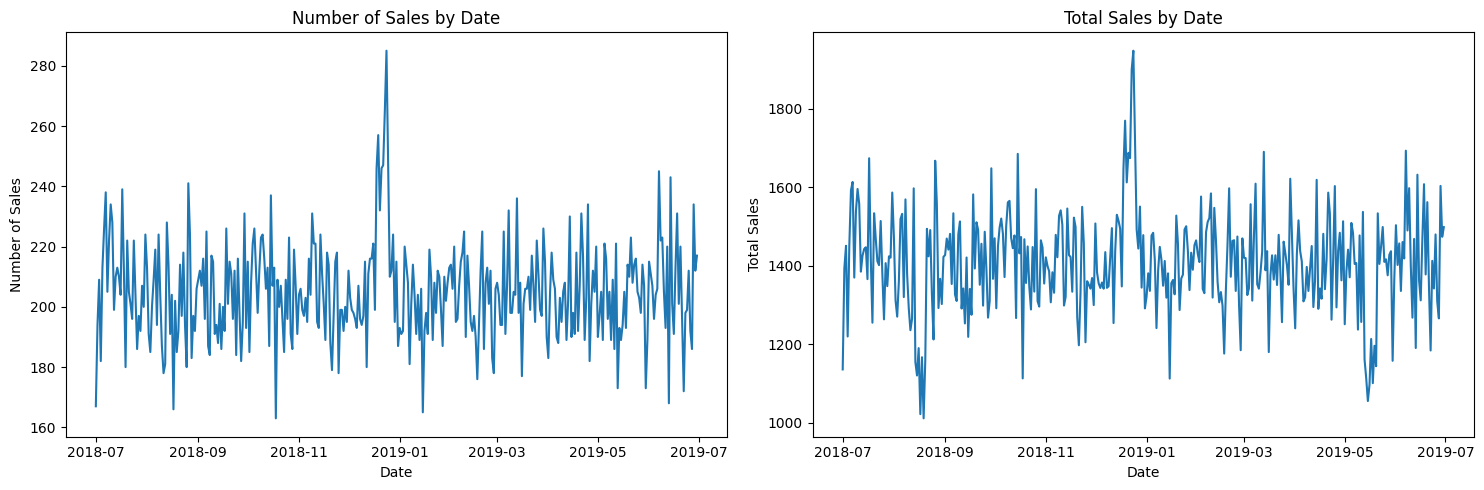

In [19]:
# Calculate number of sales by date
num_sales = merge_dataset.groupby('DATE')['PREMIUM_CUSTOMER'].count()

# Calculate total sales by date
totalsales_date = merge_dataset.groupby('DATE')['TOT_SALES'].sum()

# A figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# sales
axs[0].plot(num_sales.index, num_sales.values, linestyle='-')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Number of Sales')
axs[0].set_title('Number of Sales by Date')

# total sales
axs[1].plot(totalsales_date.index, totalsales_date.values, linestyle='-')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Total Sales')
axs[1].set_title('Total Sales by Date')

plt.tight_layout()
plt.show()

In [20]:
totalsales_date = merge_dataset.groupby('DATE')['TOT_SALES'].sum()

# Filter dates
greater1650 = totalsales_date[totalsales_date > 1650]
greater1650.sort_values(ascending=False)

lower1150 = totalsales_date[totalsales_date < 1150]
lower1150.sort_values(ascending=True)
greater1650.sort_values(ascending=False)

DATE
2018-12-24    1948.6
2018-12-23    1901.0
2018-12-19    1770.1
2019-06-07    1693.6
2019-03-13    1690.7
2018-12-21    1688.3
2018-10-15    1685.5
2018-12-22    1674.7
2018-07-17    1674.3
2018-08-26    1667.9
Name: TOT_SALES, dtype: float64

In [21]:
# Filter 12/2018
start_date = '2018-12-01'
end_date = '2018-12-31'
dec = merge_dataset[(merge_dataset['DATE'] >= start_date) & (merge_dataset['DATE'] <= end_date)]
dec.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKAGE,PRICE,LIFESTAGE,PREMIUM_CUSTOMER,BRAND
13,2018-12-01,39,39167,35641,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110,3.8,Midage singles/couples,Budget,Cobs
51,2018-12-09,130,130108,134124,40,Thins Chips Seasonedchicken 175g,2,6.6,175,3.3,Midage singles/couples,Budget,Thins
82,2018-12-28,168,168213,170685,8,Smiths Crinkle Cut Chips Original 170g,2,5.8,170,2.9,Midage singles/couples,Budget,Smiths
95,2018-12-13,184,184229,187764,61,Smiths Crinkle Cut Chips Chicken 170g,2,5.8,170,2.9,Midage singles/couples,Budget,Smiths
107,2018-12-11,222,222209,222691,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6,110,3.8,Midage singles/couples,Budget,Cobs


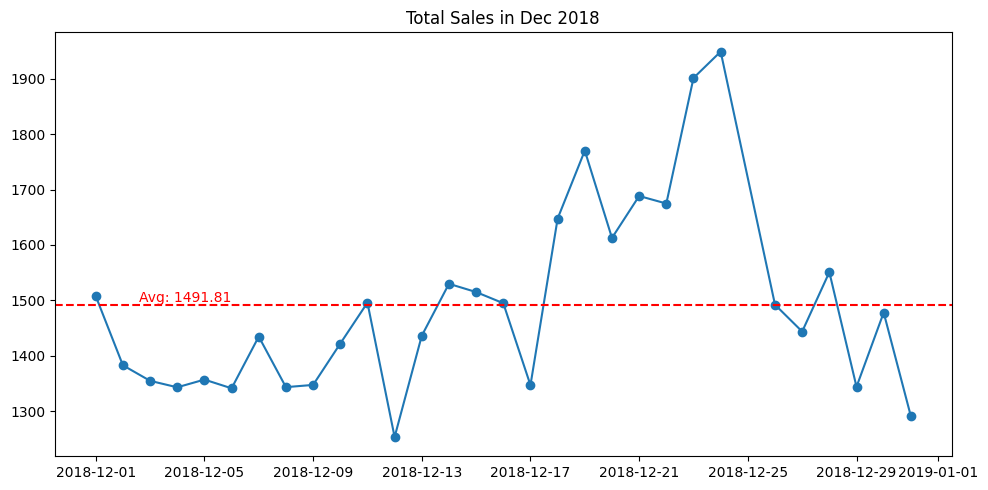

In [22]:
tot_sales_dec = dec.groupby('DATE')['TOT_SALES'].sum()
avg_dec = tot_sales_dec.mean()

plt.figure(figsize=(10,5))
plt.plot(tot_sales_dec.index, tot_sales_dec.values, linestyle = '-', marker = 'o')
plt.title('Total Sales in Dec 2018')

plt.axhline(y=avg_dec, color='r', linestyle='--', label=f'Average: {avg_dec}')
plt.text(x=tot_sales_dec.index[5], y=avg_dec, s=f'Avg: {avg_dec:.2f}', ha='right', va='bottom', color='r')

plt.tight_layout()
plt.show()

1. There is a peak sales on Christmas (23,24/12/2018) where total sales > 1700
2. Total sales in December,2018 is 1491.81, slightly higher than the mean of total sales in recorded period (1405)

=> We can put sales promotion on Christmas, esp 18-25/12, to increase Revenue

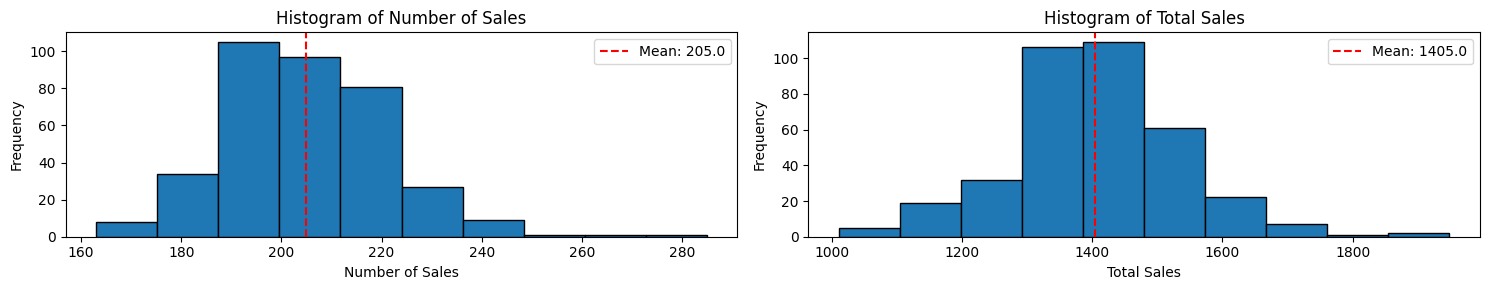

In [23]:
# check distribution of total sales

mean_num_sales = num_sales.mean().round()
mean_totalsales_date = totalsales_date.mean().round()

# Create chart
fig, axs = plt.subplots(1, 2, figsize=(15, 3))

# Histogram for number of sales
axs[0].hist(num_sales, bins=10, edgecolor='black')
axs[0].set_xlabel('Number of Sales')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Number of Sales')
axs[0].axvline(x=mean_num_sales, color='r', linestyle='--',label=f'Mean: {mean_num_sales}')
axs[0].legend()

# Histogram for total sales
axs[1].hist(totalsales_date, bins=10, edgecolor='black')
axs[1].set_xlabel('Total Sales')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Total Sales')
axs[1].axvline(x=mean_totalsales_date, color='r', linestyle='--', label=f'Mean: {mean_totalsales_date}')  # axvline: for x-axis, axhline: for y-axis
axs[1].legend()

plt.tight_layout()
plt.show()

#### Which package size is most chosen?

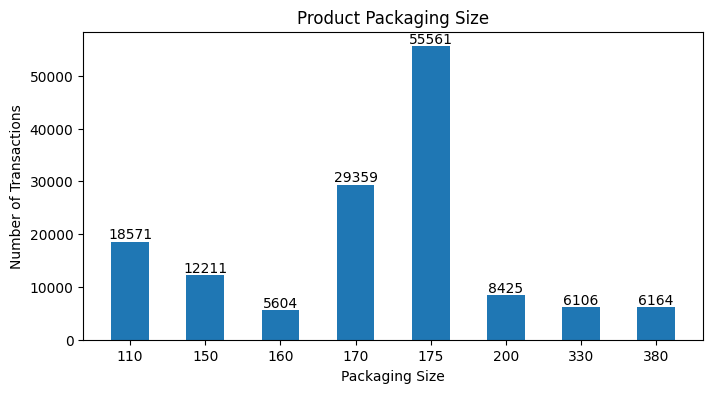

In [24]:
# Which package size is most chosen?
num_package = merge_dataset.groupby('PACKAGE')['PROD_QTY'].sum()

plt.figure(figsize=(8, 4))
bars = plt.bar(num_package.index, num_package.values, width = 0.5)

plt.xlabel('Packaging Size')
plt.ylabel('Number of Transactions')
plt.title('Product Packaging Size')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, int(height), ha = 'center', va = 'bottom')

plt.show()

#### Which brands and products are loved most? 

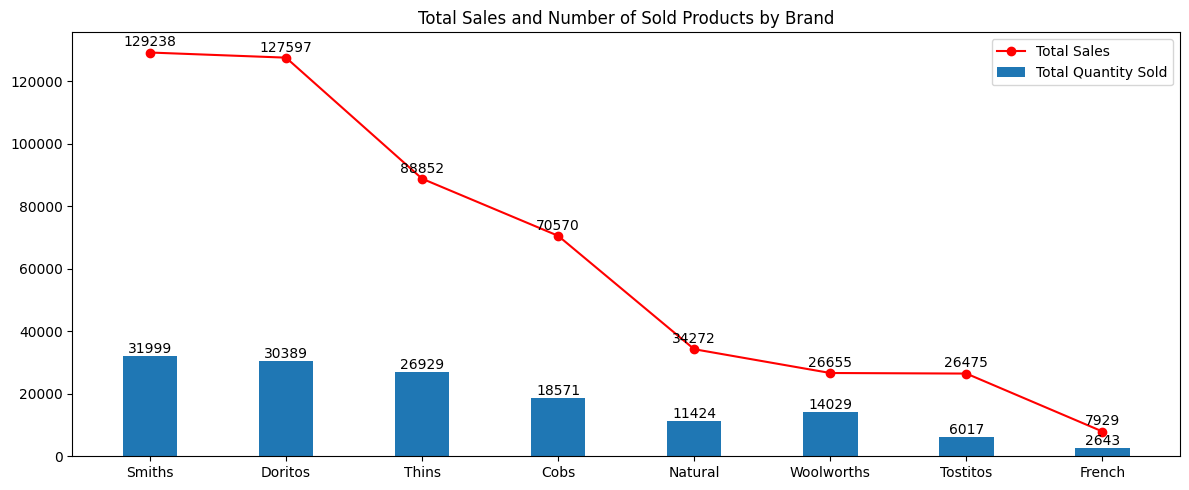

In [25]:
brand_love_quan = merge_dataset.groupby('BRAND')['PROD_QTY'].sum()
brand_love_val = merge_dataset.groupby('BRAND')['TOT_SALES'].sum().round().astype(int)

# summary
brand_summary = pd.DataFrame({'TotalSales': brand_love_val, 'TotalQuantity': brand_love_quan})
brand_summary = brand_summary.sort_values(by='TotalSales', ascending=False)

# Create chart
fig, ax = plt.subplots(figsize=(12,5))

ax.bar(brand_summary.index, brand_summary['TotalQuantity'], width=0.4, label='Total Quantity Sold')
ax.plot(brand_summary.index, brand_summary['TotalSales'], color = 'r', marker='o', label='Total Sales')
plt.title('Total Sales and Number of sold products by Brand')

for i, v in enumerate(brand_summary['TotalQuantity']):
    ax.text(i, v, str(v), ha = 'center', va = 'bottom', color = 'black')

for i, v in enumerate(brand_summary['TotalSales']):
    ax.text(i, v + 1000, str(v), ha='center', va='bottom', color='black')

ax.set_title('Total Sales and Number of Sold Products by Brand')

ax.legend()

plt.tight_layout()
plt.show()

In [26]:
# average price of each product?
avg_price = merge_dataset.groupby('PROD_NAME')['PRICE'].mean().sort_values(ascending=False)
avg_price_df = pd.DataFrame(avg_price)
avg_price_df.head()

,PRICE
PROD_NAME,
Smiths Crnkle Chip Orgnl Big Bag 380g,5.9
Smiths Crinkle Chips Salt & Vinegar 330g,5.7
Tostitos Smoked Chipotle 175g,4.4
Doritos Corn Chips Nacho Cheese 170g,4.4
Doritos Corn Chips Original 170g,4.4


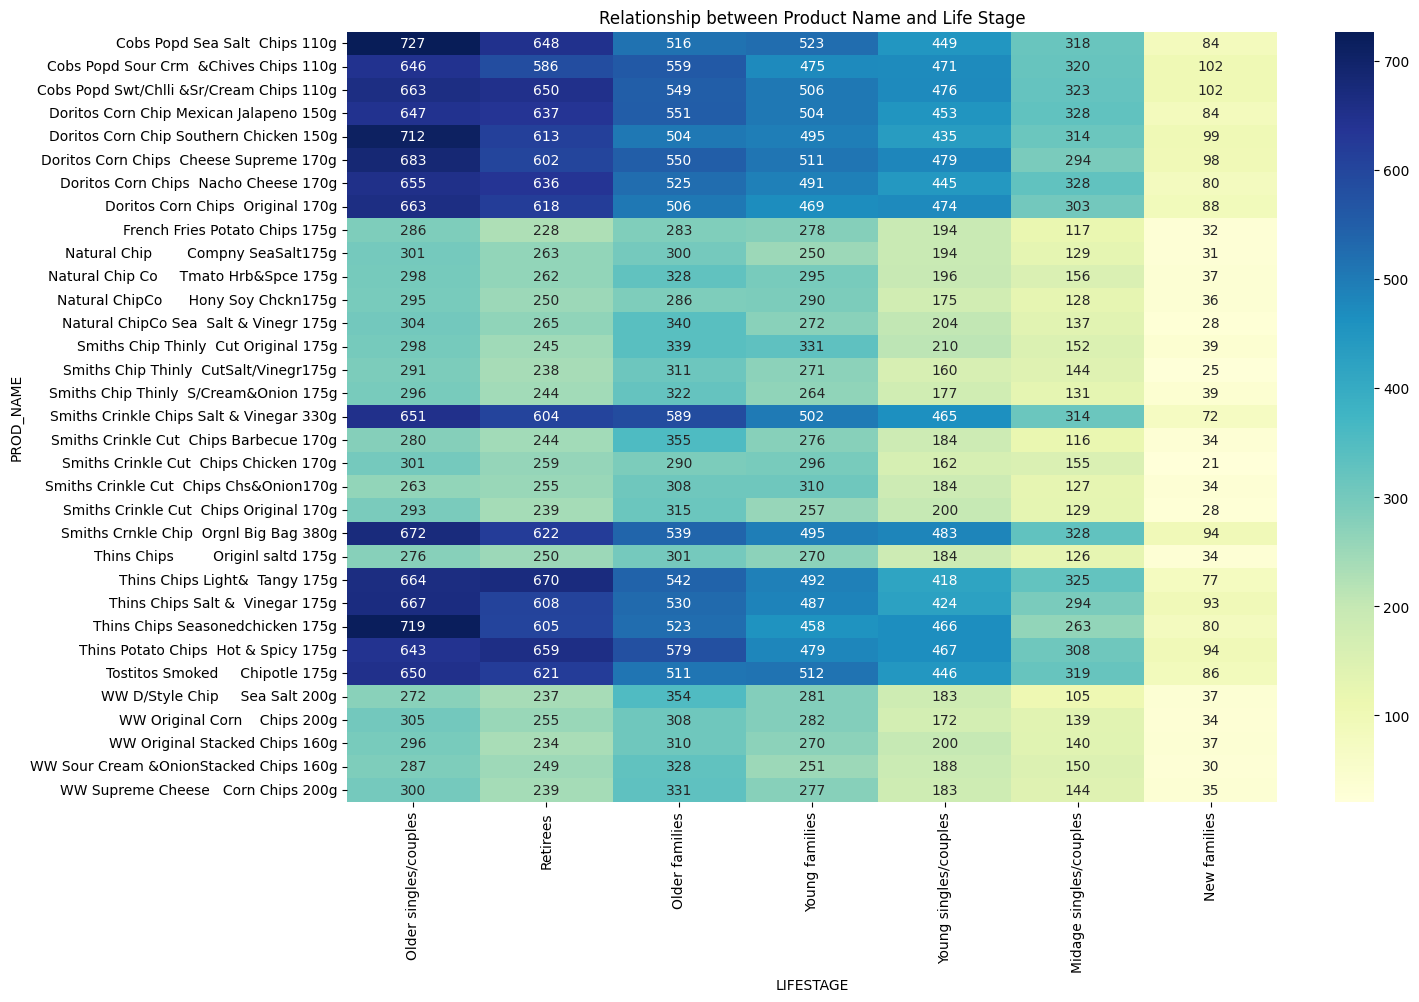

In [27]:
# Total counts for each LIFESTAGE
lifestage_counts = merge_dataset['LIFESTAGE'].value_counts().sort_values(ascending=False)

# Combination of product name and LIFESTAGE
pivot = merge_dataset.groupby(['PROD_NAME', 'LIFESTAGE']).size().unstack(fill_value=0)

# Reorder the columns based on the sorted LIFESTAGE counts
pivot = pivot[lifestage_counts.index]

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Relationship between Product Name and Life Stage')
# plt.xlabel('LIFESTAGE')
# plt.ylabel('Product Name')
plt.show()

#### Brand Insight
1. There is a big difference between Total Sales and Total Sold product among some brands (Smiths, Doritos, Thins and Cobs)

=> Those products should be pushed for sales to gain profitability

2. Top 3 favorite brands: Smiths, Doritos and Thins
- There are more product lines in Smiths than other brands
- The big package size of Smiths is preferable (300, 380g) while other size is much less sales
- Even though Doritos, Thins and Cobs have less product line but all of products is well-sold

3. Customers seem not to be sensitive with price because the price of Cobs, Doritos and Thins is higher than other brands with the same package size, the majority of Customers still choose them

4. There is a tendency that older people buy more chips than younger people. There are 2 hypothesis to explain this trend
- This store is located in the area where the majority is older
- Younger generation chooses to live healthier, therefore, they do not spend much money on chips

#### How many chips are bought per customer by segment?

In [28]:
# Do  customer return to buy?
loyal_card = merge_dataset.groupby(['LYLTY_CARD_NBR', 'DATE']).size()

greater1 = loyal_card[loyal_card > 1].count() # max = 2
greater1

131

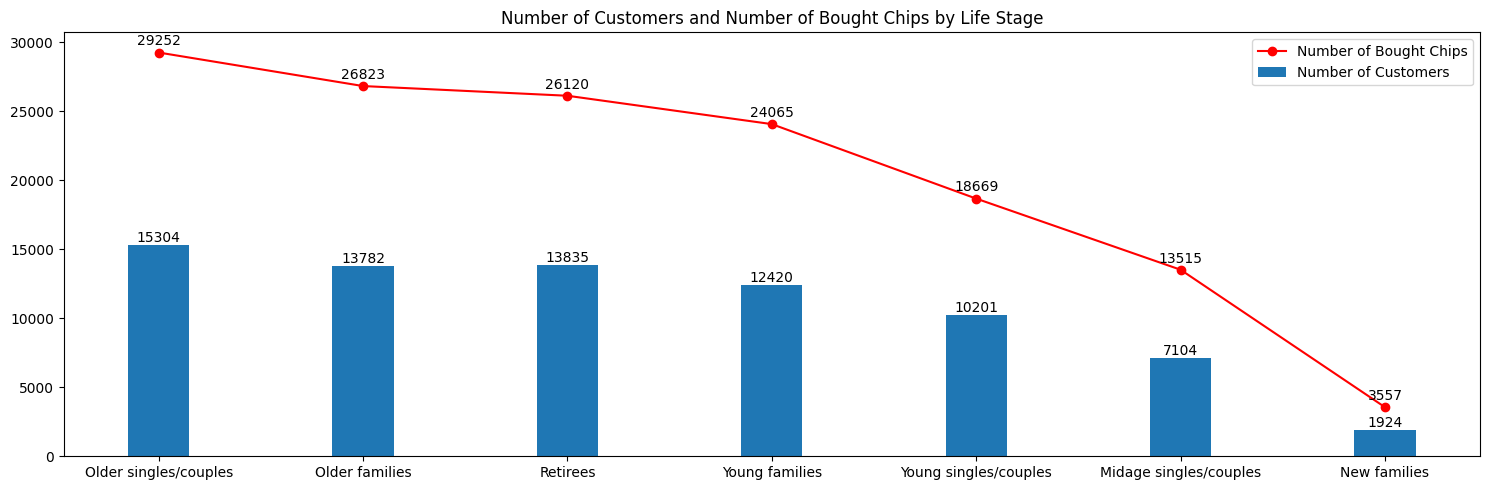

In [29]:
# Calculate #customers and sum(bought chips) as LIFESTAGE
count_seg_lifestage = merge_dataset.groupby('LIFESTAGE')['BRAND'].count()
sum_bought_chips_lifestage = merge_dataset.groupby('LIFESTAGE')['PROD_QTY'].sum()

lifestage = pd.DataFrame({'Total Products': sum_bought_chips_lifestage, 'Total Customers': count_seg_lifestage})
lifestage = lifestage.sort_values(by= 'Total Products', ascending= False)

# Create a chart
fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(lifestage.index, lifestage['Total Customers'], width=0.3, label='Number of Customers')
# ax.set_xlabel('Life Stage')

ax.plot(lifestage.index, lifestage['Total Products'].values, linestyle='-', color='r', label='Number of Bought Chips', marker = 'o')

# Legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Data annotations
for i, v in enumerate(lifestage['Total Customers']):
    ax.text(i, v, str(v), ha='center', va='bottom', color='black')

for i, v in enumerate(lifestage['Total Products']):
    ax.text(i, v + 300, str(v), ha='center', va='bottom', color='black')

ax.set_xticks(range(len(lifestage)))
ax.set_xticklabels(lifestage.index)
ax.set_title('Number of Customers and Number of Bought Chips by Life Stage')

plt.tight_layout()
plt.show()

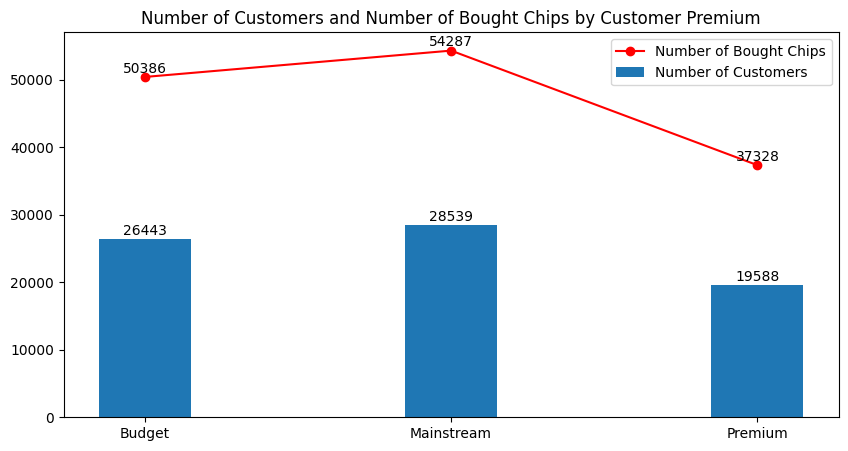

In [30]:
# Calculate #customers and sum(bought chips) as PREMIUM_CUSTOMER
count_seg_premium = merge_dataset.groupby('PREMIUM_CUSTOMER')['BRAND'].count()
sum_bought_chips_premium = merge_dataset.groupby('PREMIUM_CUSTOMER')['PROD_QTY'].sum()

# Create a chart
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(count_seg_premium.index, count_seg_premium.values, width=0.3, label='Number of Customers')
ax.plot(sum_bought_chips_premium.index, sum_bought_chips_premium.values, linestyle='-', marker = 'o', color='r', label='Number of Bought Chips')

# Legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Data annotations
for i, v in enumerate(count_seg_premium.values):
    ax.text(i, v+100, str(v), ha='center', va='bottom', color='black')

for i, v in enumerate(sum_bought_chips_premium.values):
    ax.text(i, v+200, str(v), ha='center', va='bottom', color='black')

plt.title('Number of Customers and Number of Bought Chips by Customer Premium')
plt.show()

#### Customer segment

In [31]:
#- What’s the average chip price by customer segment?
average_chip_price_premium = merge_dataset.groupby('PREMIUM_CUSTOMER')['PRICE'].mean()
average_chip_price_premium.sort_values(ascending=False)

average_chip_price_lifestage = merge_dataset.groupby('LIFESTAGE')['PRICE'].mean()
average_chip_price_lifestage.sort_values(ascending=False)

LIFESTAGE
New families              3.658160
Young singles/couples     3.651887
Retirees                  3.645858
Midage singles/couples    3.630919
Older singles/couples     3.616884
Young families            3.540259
Older families            3.518974
Name: PRICE, dtype: float64

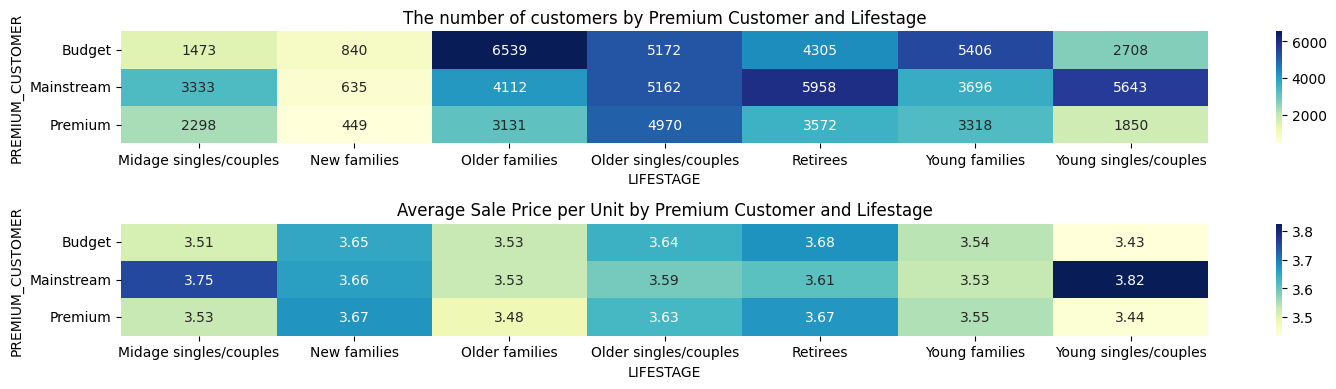

In [32]:
# Calculate the average sale price per unit for each combination of LIFESTAGE and PREMIUM_CUSTOMER
price_customer = merge_dataset.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PRICE'].mean().reset_index()
pc = price_customer.pivot(index='PREMIUM_CUSTOMER', columns='LIFESTAGE', values='PRICE')

# Combination of product name and LIFESTAGE
pt = merge_dataset.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).size().unstack(fill_value=0)

fig, axs = plt.subplots(2,1,figsize=(15,4))

sns.heatmap(pc, annot=True, cmap='YlGnBu', fmt='.2f', ax=axs[1])
axs[1].set_title('Average Sale Price per Unit by Premium Customer and Lifestage')

sns.heatmap(pt, annot=True, cmap='YlGnBu', fmt='g', ax=axs[0])
axs[0].set_title('The number of customers by Premium Customer and Lifestage')

plt.tight_layout()
plt.show()

#### Customer insights
- There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.

- Even though young, new and midage segment do not buy frequently but they are ready to pay more than the older people
    + The Mainstream Young and Midage singles/couples and Budget Retirees pay at the highest rate for a product
    + New Family is insignificant in the number of sold products but this segment is potential to focus on due to their high spending
    + Retirees and Older signles/couples are the main segments driving chips sales and revenue

- To summarize, 
    + Segments we should put more effort to raise their demand: Mainstream Midage and young singles/couple, New families
    + Segments to retain the number of customers: the olders (older families and singles/couples and retirees)